In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import torch

#from itertools import product
from pynwb import NWBHDF5IO
from nlb_tools.nwb_interface import NWBDataset

import warnings
warnings.filterwarnings("ignore")

In [14]:
ds = NWBDataset('/Users/mahmoud/data/NWB/000070/sub-Jenkins/sub-Jenkins_ses-20090916_behavior+ecephys.nwb', split_heldout=False)

Dropping Position_Cursor due to timestamp mismatch.
Dropping Position_Eye due to timestamp mismatch.
Dropping Position_Hand due to timestamp mismatch.
Spikes found outside of observed interval.


In [22]:
trial_info = ds.trial_info
trial_info

,trial_id,start_time,end_time,target_presentation_time,go_cue_time,reaction_time,move_begins_time,move_ends_time,discard_trial,task_success,...,correct_reach,maze_num_targets,maze_num_barriers,novel_maze,target_positions,frame_details,hit_target_position,target_size,barrier_info,timeseries
0,0,0 days 00:00:08.853966667,0 days 00:00:12.693966667,0 days 00:00:09.751966667,0 days 00:00:10.498966667,0 days 00:00:00.375000,0 days 00:00:10.830966667,0 days 00:00:11.295966667,0,1,...,1,3,9,0,"[[133, -81], [-118, -83], [-77, 82]]","[[[-200]], [[200]], [[-155]], [[155]], [[20]]]","[133, -81]",13,"[[-33.0, 47.0, 6.0, 37.0], [-77.0, 48.0, 11.0,...","[(0, 3141, Eye pynwb.behavior.SpatialSeries at..."
1,1,0 days 00:00:17.774200,0 days 00:00:21.348966667,0 days 00:00:18.490200,0 days 00:00:19.037200,0 days 00:00:00.340000,0 days 00:00:19.346200,0 days 00:00:19.881200,0,1,...,1,3,8,0,"[[132, 56], [131, -55], [-118, -7]]","[[[-200]], [[200]], [[-155]], [[155]], [[20]]]","[-118, -7]",13,"[[-64.0, -47.0, 113.0, 7.0], [-64.0, -39.0, 40...","[(3141, 2806, Eye pynwb.behavior.SpatialSeries..."
2,2,0 days 00:00:22.143866667,0 days 00:00:25.718733333,0 days 00:00:22.941866667,0 days 00:00:23.905866667,0 days 00:00:00.335000,0 days 00:00:24.200866667,0 days 00:00:24.500866667,0,1,...,1,1,0,0,"[[-118, -7]]","[[[-200]], [[200]], [[-155]], [[155]], [[20]]]","[-118, -7]",13,[],"[(5947, 3056, Eye pynwb.behavior.SpatialSeries..."
3,3,0 days 00:00:26.579000,0 days 00:00:29.914000,0 days 00:00:27.361000,0 days 00:00:27.858000,0 days 00:00:00.350000,0 days 00:00:28.176000,0 days 00:00:28.591000,0,1,...,1,3,8,0,"[[132, 56], [131, -55], [-118, -7]]","[[[-200]], [[200]], [[-155]], [[155]], [[20]]]","[131, -55]",13,"[[-64.0, -47.0, 113.0, 7.0], [-64.0, -39.0, 40...","[(9003, 2711, Eye pynwb.behavior.SpatialSeries..."
4,4,0 days 00:00:30.578866667,0 days 00:00:34.048766667,0 days 00:00:31.528866666,0 days 00:00:32.226866667,0 days 00:00:00.310000,0 days 00:00:32.495866667,0 days 00:00:32.825866667,0,1,...,1,1,0,0,"[[133, -81]]","[[[-200]], [[200]], [[-155]], [[155]], [[20]]]","[133, -81]",13,[],"[(11714, 2946, Eye pynwb.behavior.SpatialSerie..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260,2260,0 days 03:26:08.759931448,0 days 03:26:13.144564781,0 days 03:26:09.700931448,0 days 03:26:10.197931448,0 days 00:00:00.560000,0 days 03:26:11.431931448,0 days 03:26:11.801931448,0,1,...,0,3,9,0,"[[133, -81], [-118, -83], [-77, 82]]","[[[-200]], [[200]], [[-155]], [[155]], [[20]]]","[-77, 82]",13,"[[-33.0, 47.0, 6.0, 37.0], [-77.0, 48.0, 11.0,...","[(6806955, 3741, Eye pynwb.behavior.SpatialSer..."
2261,2261,0 days 03:26:13.914598115,0 days 03:26:16.944464781,0 days 03:26:14.819598115,0 days 03:26:15.583598115,0 days 00:00:00.470000,0 days 03:26:16.016598115,0 days 03:26:16.266598115,0,0,...,0,1,0,0,"[[132, 56]]","[[[-200]], [[200]], [[-155]], [[155]], [[20]]]","[132, 56]",13,[],"[(6810696, 3030, Eye pynwb.behavior.SpatialSer..."
2262,2262,0 days 03:26:44.794664781,0 days 03:26:48.349531448,0 days 03:26:45.517664781,0 days 03:26:46.365664781,0 days 00:00:00.365000,0 days 03:26:46.696664781,0 days 03:26:47.056664781,0,1,...,1,1,0,0,"[[-130, -13]]","[[[-200]], [[200]], [[-155]], [[155]], [[20]]]","[-130, -13]",13,[],"[(6813857, 2961, Eye pynwb.behavior.SpatialSer..."
2263,2263,0 days 03:26:49.369664781,0 days 03:26:52.709664781,0 days 03:26:50.136664781,0 days 03:26:50.567664781,0 days 00:00:00.370000,0 days 03:26:50.896664781,0 days 03:26:51.306664781,0,1,...,1,1,8,0,"[[123, -81]]","[[[-200]], [[200]], [[-155]], [[155]], [[20]]]","[123, -81]",13,"[[-65.0, -15.0, 51.0, 14.0], [-79.0, -55.0, 6....","[(6816818, 2636, Eye pynwb.behavior.SpatialSer..."


In [26]:
for column in trial_info.columns:
    print(column)

trial_id
start_time
end_time
target_presentation_time
go_cue_time
reaction_time
move_begins_time
move_ends_time
discard_trial
task_success
trial_type
trial_version
proto_trial
maze_condition
correct_reach
maze_num_targets
maze_num_barriers
novel_maze
target_positions
frame_details
hit_target_position
target_size
barrier_info
timeseries


In [28]:
# Note that there is a number of trials at the begining of the session(s) that has no metadata at all.
# The NWBDataset function: make_trial_data() drops all of those.

print(f"Total num of trials: {len(trial_info)}\n")
print("Count of null values in each column:\n")

ds.trial_info.isnull().sum()

Total num of trials: 2265

Count of null values in each column:



trial_id                     0
start_time                   0
end_time                     0
target_presentation_time     0
go_cue_time                  0
reaction_time                0
move_begins_time             0
move_ends_time              13
discard_trial                0
task_success                 0
trial_type                   0
trial_version                0
proto_trial                  0
maze_condition               0
correct_reach                0
maze_num_targets             0
maze_num_barriers            0
novel_maze                   0
target_positions             0
frame_details                0
hit_target_position          0
target_size                  0
barrier_info                 0
timeseries                   0
dtype: int64

In [30]:
# Number of all time bins in the entire dataset.
# That's right, each row is the measures in one time bin.
# Also, the original sampling rate is 100Hz (10ms bin size).
# Keep in mind that not all the trials are the same length.

len(ds.data)

12417020

In [63]:
# The make_trial_data() returns a DataFrame containing trialized data. It has the same fields as the continuous `dataset.data` DataFrame,
# But adds `trial_id`, `trial_time`, and `align_time`. Till here, each row is still a time bin.
# Note: Later we do the cropping and alignment arount move_onset by ourselves.

trial_data = ds.make_trial_data(allow_nans=True)
trial_data

NaNs found in 47.14% of `trial_data`.


Processed_A001                                                   \
                  0000   0001   0002   0003   0004   0005   0006   0007   
0                 94.0  102.0  133.0  143.0  167.0  132.0  154.0  115.0   
1                100.0  101.0  137.0  124.0  150.0  141.0  139.0  113.0   
2                109.0  103.0  145.0  114.0  153.0  149.0  131.0  105.0   
3                109.0  109.0  138.0  130.0  144.0  149.0  126.0   98.0   
4                106.0  112.0  126.0  144.0  128.0  141.0  119.0  104.0   
...                ...    ...    ...    ...    ...    ...    ...    ...   
8197239            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
8197240            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
8197241            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
8197242            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
8197243            NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                       ... spikes                                    trial_id  \
          0008   0009  ...    184  185  186  187  188  189  190  191            
0        172.0   94.0  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0   
1        167.0  105.0  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0   
2        159.0  120.0  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0   
3        153.0  140.0  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0   
4        140.0  145.0  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0   
...        ...    ...  ...    ...  ...  ...  ...  ...  ...  ...  ...      ...   
8197239    NaN    NaN  ...    0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0     2264   
8197240    NaN    NaN  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     2264   
8197241    NaN    NaN  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     2264   
8197242    NaN    NaN  ...    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     2264   
8197243    NaN    NaN  ...    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     2264   

                    trial_time  
                                
0              0 days 00:00:00  
1       0 days 00:00:00.001000  
2       0 days 00:00:00.002000  
3       0 days 00:00:00.003000  
4       0 days 00:00:00.004000  
...                        ...  
8197239 0 days 00:00:03.105000  
8197240 0 days 00:00:03.106000  
8197241 0 days 00:00:03.107000  
8197242 0 days 00:00:03.108000  
8197243 0 days 00:00:03.109000  

[8197244 rows x 581 columns]

In [67]:
trial_info['trial_id'].size

2265

In [68]:
trial_info['task_success'].value_counts()

1    2241
0      24
Name: task_success, dtype: int64

In [69]:
trial_info['correct_reach'].value_counts()

1    1379
0     886
Name: correct_reach, dtype: int64

In [73]:
np.isnan(trial_data['spikes'].to_numpy().flatten()).any()

KeyboardInterrupt: 

In [77]:
trials = [trial[1] for trial in trial_data.groupby('trial_id')]
len(trials)

2265

In [ ]:
ddd =[]
for trial_id, trial in trial_data.groupby('trial_id'):
    ddd.append(trial_id)
    print(len(ddd))
    print(ddd)

<function matplotlib.pyplot.show(close=None, block=None)>

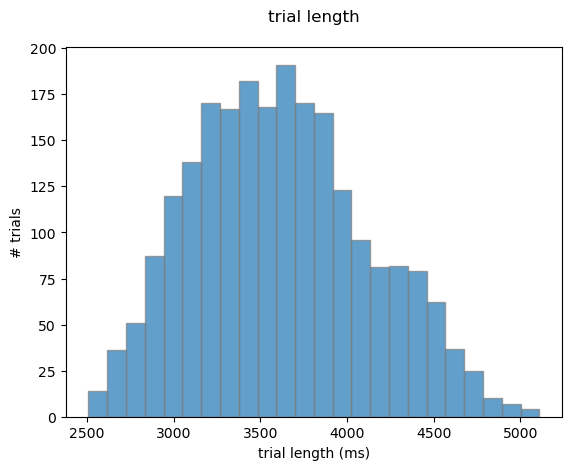

In [91]:
trial_lens = []

for trial_id, trial in enumerate(trials):
#for trial_id, trial in trial_data.groupby('trial_id'):
    trial_id_trial_info = trial_info[trial_info['trial_id'] == trial_id]
    
    trial_lens.append((trial.trial_time.values[-1] / np.timedelta64(1, 'ms')) - (trial.trial_time.values[0] / np.timedelta64(1, 'ms')))
    
plt.hist(trial_lens, bins='auto', density=False, alpha=0.7, edgecolor='gray')
plt.title('trial length\n')
plt.xlabel('trial length (ms)')
plt.ylabel('# trials')
#plt.savefig('output_figs/tl.png')
plt.show

In [129]:
inter_trial_intervals = []
    
for trial_id, trial in enumerate(trials):
    trial_id_next = trial_id + 1
    trial_id_trial_info = trial_info[trial_info['trial_id'] == trial_id]
    trial_id_trial_info_next = trial_info[trial_info['trial_id'] == trial_id_next]
    
    inter_trial_intervals.append((trial_id_trial_info_next['start_time'].values[-1] / np.timedelta64(1, 'ms')) - (trial_id_trial_info['end_time'].values[-1] / np.timedelta64(1, 'ms')))
    
plt.hist(inter_trial_intervals, bins='auto', density=False, alpha=0.7, edgecolor='gray')
plt.title('intertrial interval\n')
plt.xlabel('intertrial interval (ms)')
plt.ylabel('# trials')
#plt.savefig('output_figs/iit.png')
plt.show()

IndexError: index -1 is out of bounds for axis 0 with size 0

In [127]:
trial_id_trial_info_next['start_time'].values[-1]

numpy.timedelta64(17774200000,'ns')

In [143]:
trial_id_trial_info_next['start_time']

Series([], Name: start_time, dtype: timedelta64[ns])

In [161]:
trial_id_trial_info = trial_info[trial_info['trial_id'] == 0]
trial_id_trial_info['move_begins_time'][0] / np.timedelta64(1, 'ms')

10830.966667

In [162]:
trial_id_trial_info = trial_info[trial_info['trial_id'] == 1]
trial_id_trial_info['move_begins_time'][0] / np.timedelta64(1, 'ms')

KeyError: 0

In [166]:
trial_id_trial_info = trial_info[trial_info['trial_id'] == 0]
trial_id_trial_info['move_begins_time'].values[0]

numpy.timedelta64(10830966667,'ns')

In [158]:
trial_id_trial_info = trial_info[trial_info['trial_id'] == 1]
trial_id_trial_info['move_begins_time']

1   0 days 00:00:19.346200
Name: move_begins_time, dtype: timedelta64[ns]

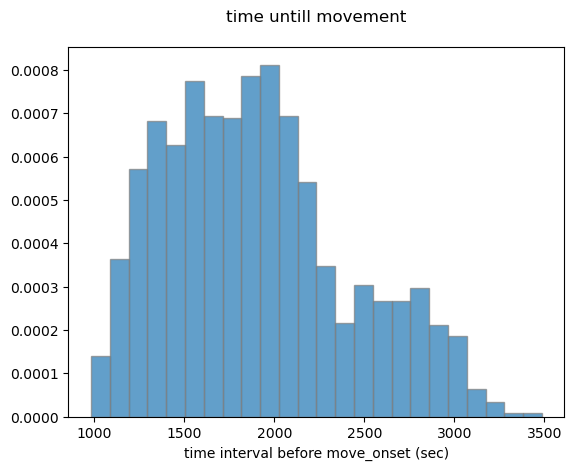

In [170]:
time_utill_move = []

for trial_id, trial in enumerate(trials):
    trial_id_trial_info = trial_info[trial_info['trial_id'] == trial_id]
    
    time_utill_move.append((trial_id_trial_info['move_begins_time'].values[0] / np.timedelta64(1, 'ms')) - (trial_id_trial_info['start_time'].values[0] / np.timedelta64(1, 'ms')))
    
plt.hist(time_utill_move, bins='auto', density=True, alpha=0.7, edgecolor='gray')
plt.title('time untill movement\n')
plt.xlabel('time interval before move_onset (sec)')
plt.savefig('output_figs/tibm.png')
plt.show()

In [ ]:
time_after_move = []

for i, _ in enumerate(trials):
    trial_id = i + n_null_trials
    trial_id_trial_info = trial_info[trial_info['trial_id'] == trial_id]
    
    time_after_move.append((trial_id_trial_info['end_time'].iloc[0] / np.timedelta64(1, 's')) - (trial_id_trial_info['move_onset_time'].iloc[0] / np.timedelta64(1, 's')))
    
plt.hist(time_after_move, bins='auto', density=False, alpha=0.7, edgecolor='gray')
plt.title('time after movement\n')
plt.xlabel('time interval after move_onset (sec)')
plt.savefig('output_figs/tiam.png')
plt.show()

### Forming conditions

In [ ]:
def get_simple_cond(angle):
        
    if 350 <= angle < 360 or 0 <= angle < 38:
        return 0
    elif 38 <= angle < 125:
        return 1
    elif 125 <= angle < 175:
        return 2
    elif 175 <= angle < 212:
        return 3
    elif 212 <= angle < 232:
        return 4
    elif 232 <= angle < 280:
        return 5
    elif 280 <= angle <= 329:
        return 6
    elif 329 <= angle <= 350:
        return 7
    else:
        raise ValueError("Angle out of range")

def n_unigue_conds(trial_conds):
    # Convert each list to a frozenset and use a set to track unique frozensets
    unique_conds = set(frozenset(cond) for cond in trial_conds)
    return len(unique_conds)

In [ ]:
## Plot trial-averaged reaches

# Find unique conditions
conds = trial_info.set_index(['trial_type', 'trial_version']).index.unique().tolist()
conds = [cond for cond in conds if not any(math.isnan(x) for x in cond)]

# Initialize plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Loop over conditions and compute average trajectory
for cond in conds:
    # Find trials in condition
    mask = np.all(trial_info[['trial_type', 'trial_version']] == cond, axis=1)
    # Extract trial data
    trial_d = dataset.make_trial_data(ignored_trials=(~mask))
    # Average hand position across trials
    traj = trial_d.groupby('align_time')[[('hand_pos', 'x'), ('hand_pos', 'y')]].mean().to_numpy()
    # Determine reach angle for color
    active_target = trial_info[mask].target_pos.iloc[0][int(dataset.trial_info[mask].active_target.iloc[0])]
    reach_angle = np.arctan2(*active_target[::-1])
    # Plot reach
    ax.plot([0, traj[:, 0][-1]], [0, traj[:, 1][-1]], linewidth=0.7, color=plt.cm.hsv(reach_angle / (2*np.pi) + 0.5))

angle_radians = np.radians(350)
x_end = 140 * np.cos(angle_radians)
y_end = 140 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=0.7, color='black')
'''
angle_radians = np.radians(16)
x_end = 140 * np.cos(angle_radians)
y_end = 140 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=0.7, color='black')
'''
angle_radians = np.radians(38)
x_end = 80 * np.cos(angle_radians)
y_end = 80 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=0.7, color='black')

angle_radians = np.radians(125)
x_end = 50 * np.cos(angle_radians)
y_end = 50 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=0.7, color='black')

angle_radians = np.radians(175)
x_end = 140 * np.cos(angle_radians)
y_end = 140 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=0.7, color='black')
'''
angle_radians = np.radians(193)
x_end = 140 * np.cos(angle_radians)
y_end = 140 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=0.7, color='black')
'''
angle_radians = np.radians(212)
x_end = 140 * np.cos(angle_radians)
y_end = 140 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=0.7, color='black')

angle_radians = np.radians(232)
x_end = 140 * np.cos(angle_radians)
y_end = 140 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=0.7, color='black')

angle_radians = np.radians(280)
x_end = 100 * np.cos(angle_radians)
y_end = 100 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=0.7, color='black')

angle_radians = np.radians(329)
x_end = 140 * np.cos(angle_radians)
y_end = 140 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=0.7, color='black')

angle_radians = np.radians(0)
x_end = 140 * np.cos(angle_radians)
y_end = 140 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=1.7, color='navy')

angle_radians = np.radians(90)
x_end = 50 * np.cos(angle_radians)
y_end = 50 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=1.7, color='navy')

angle_radians = np.radians(180)
x_end = 140 * np.cos(angle_radians)
y_end = 140 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=1.7, color='navy')

angle_radians = np.radians(270)
x_end = 100 * np.cos(angle_radians)
y_end = 100 * np.sin(angle_radians)
ax.plot([0, x_end], [0, y_end], linewidth=1.7, color='navy')

plt.axis('off')
plt.show()

In [ ]:
## Plot trial-averaged reaches

# Find unique conditions
maze_conds = trial_info.set_index(['trial_type', 'trial_version']).index.unique().tolist()
maze_conds = [cond for cond in maze_conds if not any(math.isnan(x) for x in cond)]

orig_conds = {}
simp_conds = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[]}

fig = plt.figure(figsize=(6, 6))
fig.suptitle('Aligned trials (same length)')
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Loop over conditions and compute average trajectory
for cond_idx, cond in enumerate(maze_conds):
    # Find trials in condition
    mask = np.all(dataset.trial_info[['trial_type', 'trial_version']] == cond, axis=1)
    trial_d = dataset.make_trial_data(align_field='move_onset_time', align_range=(-240, 660), ignored_trials=(~mask))
    traj = trial_d.groupby('align_time')[[('hand_pos', 'x'), ('hand_pos', 'y')]].mean().to_numpy()
    # Determine reach angle for color
    reach_angle = np.arctan2(*trial_info[mask].target_pos.iloc[0][int(trial_info[mask].active_target.iloc[0])][::-1])
    # Plot reach
    ax.plot(traj[:, 0], traj[:, 1], linewidth=0.7, color=plt.cm.hsv(reach_angle / (2*np.pi) + 0.5))
    
    orig_conds[cond_idx] = trial_d.trial_id.drop_duplicates().values
    simp_conds[get_simple_cond(math.degrees(reach_angle) + 360 / 2)].append(trial_d.trial_id.drop_duplicates().values)

simp_conds = {key: np.concatenate(value) for key, value in simp_conds.items()}
    
plt.axis('off')
plt.show()

In [ ]:
conds = []
for trial_id, trial in trial_data.groupby('trial_id'):
    trial_id_trial_info = trial_info[trial_info['trial_id'] == trial_id]
    
    for cond, trial_ids in orig_conds.items():
        if trial_id in trial_ids:
            conds.append(cond)
            break
            
maze_conds = torch.tensor(maze_conds)
conds = torch.tensor(conds)

print(maze_conds.shape)
print(conds.shape)

In [ ]:
_, cond_counts = torch.unique(conds, return_counts=True)
cond_counts

## Forming trials and label vectors

In [ ]:
#[col for col in trial_data.columns if any(_ in col for _ in ['vel', 'pos', 'force', 'acc', 'target'])]
label_cols = [col for col in trial_data.columns if any(_ in col for _ in ['x', 'y'])]

In [ ]:
label_cols

In [ ]:
# Align the trials arount the move_onset bin with offsets before and after that bin.
y = []
labels = []
target_pos = []
active_target = []
conds = []

# We want total trial length of 900ms, which is 90 time bins.
bins_before_move = 48
bins_after_move = 132

trial_length = bins_before_move + bins_after_move
n_trials = trial_data.shape[0] // trial_length

for trial_id, trial in trial_data.groupby('trial_id'):
    trial_id_info = trial_info[trial_info['trial_id'] == trial_id]
            
    # Get the untill movement in ms.
    move_time = (trial_id_info['move_onset_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_id_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))
    # Get the number of bins until movement.
    move_bin = int(move_time // binsize)

    y_heldin_t = torch.tensor(trial.spikes.values)
    y_heldout_t = torch.tensor(trial.heldout_spikes.values)
    
    # Crop the trials arount the move_onset bin with offsets before and after that bin.
    y_t = torch.concat(
        [y_heldin_t[move_bin-bins_before_move:move_bin+bins_after_move, :], y_heldout_t[move_bin-bins_before_move:move_bin+bins_after_move, :]], dim=-1
    )
    
    y.append(y_t.reshape(1, trial_length, n_neurons))
    labels.append(torch.tensor(trial.cursor_pos.values[move_bin-bins_before_move:move_bin+bins_after_move, :]).reshape(1, trial_length, 2))
    
    target_pos.append(trial_id_info.target_pos.values[0])
    active_target.append(int(trial_id_info.active_target.values[0]))
    
    for cond, trial_ids in orig_conds.items():
        if trial_id in trial_ids:
            conds.append(cond)
    
y = torch.concat(y, dim=0)
labels = torch.concat(labels, dim=0)
conds = torch.tensor(conds)
active_target = torch.tensor(active_target)

print(y.shape)
print(labels.shape)
print(conds.shape)
print(len(target_pos))
print(active_target.shape)

### Forming events occurance time bins

In [ ]:
for i, _ in enumerate(trials):
    trial_id = i + n_null_trials
    trial_id_trial_info = trial_info[trial_info['trial_id'] == trial_id]
    
    target_on = (((trial_id_trial_info['target_on_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_id_trial_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))) // binsize)
    gocue = (((trial_id_trial_info['go_cue_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_id_trial_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))) // binsize)
    move_onset = (((trial_id_trial_info['move_onset_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_id_trial_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))) // binsize)

In [ ]:
target_bins = []
gocue_bins = []
move_bins = []
event_bins = []

for i, _ in enumerate(trials):
    trial_id = i + n_null_trials
    trial_id_trial_info = trial_info[trial_info['trial_id'] == trial_id]
    
    # target : go
    delay = (((trial_id_trial_info['go_cue_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_id_trial_info['target_on_time'].iloc[0] / np.timedelta64(1, 'ms'))) // binsize)
    # go : move
    prep = (((trial_id_trial_info['move_onset_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_id_trial_info['go_cue_time'].iloc[0] / np.timedelta64(1, 'ms'))) // binsize)
    
    target_on = (((trial_id_trial_info['target_on_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_id_trial_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))) // binsize)
    gocue = (((trial_id_trial_info['go_cue_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_id_trial_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))) // binsize)
    move_onset = (((trial_id_trial_info['move_onset_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_id_trial_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))) // binsize)
    
    target_bins.append(target_on - move_onset + bins_before_move)
    gocue_bins.append(gocue - move_onset + bins_before_move)
    move_bins.append(bins_before_move)

event_bins.append(torch.tensor(target_bins))
event_bins.append(torch.tensor(gocue_bins))
event_bins.append(torch.tensor(move_bins))
event_bins = torch.stack(event_bins)
event_bins.shape

In [ ]:
event_bins = event_bins.permute(1, 0)

event_bins[event_bins < 0] = float('nan')
event_bins[event_bins > bins_before_move + bins_after_move] = float('nan')
event_bins.shape

In [ ]:
event_bins

### Save data splits

In [ ]:
import torch

!mkdir data
save_root_path = 'data/'

train_data, valid_data, test_data = {}, {}, {}
n_trials, seq_len, n_neurons = y.shape
n_valid_trials = 574

# obs: observations
train_data['y_obs'] = torch.Tensor(y[:-n_valid_trials])
valid_data['y_obs'] = torch.Tensor(y[-n_valid_trials:-n_valid_trials // 2])
test_data['y_obs'] = torch.Tensor(y[-n_valid_trials // 2:])

# 'n_bins_enc': Number of time bins used later by in modeling for enconding (default full trial).
# 'n_bins_obs': originaly observed trial length (after alignment)
# Same for 'n_neurons_obs' and 'n_neurons_enc'.
train_data['n_bins_obs'] = valid_data['n_bins_obs'] = test_data['n_bins_obs'] = seq_len
train_data['n_bins_enc'] = valid_data['n_bins_enc'] = test_data['n_bins_enc'] = seq_len
train_data['n_neurons_obs'] = valid_data['n_neurons_obs'] = test_data['n_neurons_obs'] = n_neurons
train_data['n_neurons_enc'] = valid_data['n_neurons_enc'] = test_data['n_neurons_enc'] = n_neurons

# Save a 1D array for event bins for each data split, for each trial, for each event.
# Note: the o here in event_bins[0] is the session-animal group.
for event_id, event in enumerate(['targrt_on_bin', 'go_cue_bin', 'move_onset_bin']):
    train_data[event] = torch.Tensor(np.array(event_bins[:-n_valid_trials, event_id]))
    valid_data[event] = torch.Tensor(np.array(event_bins[-n_valid_trials:-n_valid_trials // 2, event_id]))
    test_data[event] = torch.Tensor(np.array(event_bins[-n_valid_trials // 2:, event_id]))

train_data['hand_vel'] = torch.Tensor(np.array(labels[:-n_valid_trials, :, :]))
valid_data['hand_vel'] = torch.Tensor(np.array(labels[-n_valid_trials:-n_valid_trials // 2, :, :]))
test_data['hand_vel'] = torch.Tensor(np.array(labels[-n_valid_trials // 2:, :, :]))

train_data['conds'] = torch.Tensor(np.array(conds[:-n_valid_trials]))
valid_data['conds'] = torch.Tensor(np.array(conds[-n_valid_trials:-n_valid_trials // 2]))
test_data['conds'] = torch.Tensor(np.array(conds[-n_valid_trials // 2:]))

train_data['target_pos'] = target_pos[:-n_valid_trials]
valid_data['target_pos'] = target_pos[-n_valid_trials:-n_valid_trials // 2]
test_data['target_pos'] = target_pos[-n_valid_trials // 2:]

train_data['active_target'] = torch.Tensor(np.array(active_target[:-n_valid_trials]))
valid_data['active_target'] = torch.Tensor(np.array(active_target[-n_valid_trials:-n_valid_trials // 2]))
test_data['active_target'] = torch.Tensor(np.array(active_target[-n_valid_trials // 2:]))

'''
for label_id, label in enumerate(label_cols):
    train_data[f'{label[0]}_{label[1]}'] = torch.Tensor(np.array(labels[:-n_valid_trials, :, :]))
    valid_data[f'{label[0]}_{label[1]}'] = torch.Tensor(np.array(labels[-n_valid_trials:-n_valid_trials // 2, :, :]))
    test_data[f'{label[0]}_{label[1]}'] = torch.Tensor(np.array(labels[-n_valid_trials // 2:, :, :]))
'''
torch.save(train_data, save_root_path + f'data_train_{binsize}ms.pt')
torch.save(valid_data, save_root_path + f'data_valid_{binsize}ms.pt')
torch.save(test_data, save_root_path + f'data_test_{binsize}ms.pt')

print('Data splits (train/valid/test) saved into the "data" folder.')

## Load data splits

In [ ]:
data_path = 'data/data_{split}_{bin_sz_ms}ms.pt'
train_data = torch.load(data_path.format(split='train', bin_sz_ms=cfg.bin_sz_ms))
val_data = torch.load(data_path.format(split='valid', bin_sz_ms=cfg.bin_sz_ms))
test_data = torch.load(data_path.format(split='test', bin_sz_ms=cfg.bin_sz_ms))

y_train_obs = train_data['y_obs'].type(torch.float32).to(cfg.data_device)
y_valid_obs = val_data['y_obs'].type(torch.float32).to(cfg.data_device)
y_test_obs = test_data['y_obs'].type(torch.float32).to(cfg.data_device)

vel_train = train_data['velocity'].type(torch.float32).to(cfg.data_device)
vel_valid = val_data['velocity'].type(torch.float32).to(cfg.data_device)
vel_test = test_data['velocity'].type(torch.float32).to(cfg.data_device)

y_train_dataset = torch.utils.data.TensorDataset(y_train_obs, vel_train)
y_val_dataset = torch.utils.data.TensorDataset(y_valid_obs, vel_valid)
y_test_dataset = torch.utils.data.TensorDataset(y_test_obs, vel_test)

train_dataloader = torch.utils.data.DataLoader(y_train_dataset, batch_size=cfg.batch_sz, shuffle=True)
valid_dataloader = torch.utils.data.DataLoader(y_val_dataset, batch_size=y_valid_obs.shape[0], shuffle=False)
test_dataloader = torch.utils.data.DataLoader(y_test_dataset, batch_size=y_valid_obs.shape[0], shuffle=False)

# Data dimensions
n_train_trials, n_time_bins, n_neurons_obs = y_train_obs.shape
n_valid_trials = y_valid_obs.shape[0]
n_test_trials = y_test_obs.shape[0]
n_time_bins_enc = train_data['n_time_bins_enc']

batch_sz_train = list(y_train_obs.shape)[:-1]
batch_sz_valid = list(y_valid_obs.shape)[:-1]
batch_sz_test = list(y_test_obs.shape)[:-1]

print("# training trials: {0}".format(n_train_trials))
print("# validation trials: {0}".format(n_valid_trials))
print("# testing trials: {0}".format(n_test_trials))
print("# neurons: {0}".format(n_neurons_obs))
print("# time bins: {0}".format(n_time_bins))
print("# time bins used for forcasting: {0}".format(cfg.n_bins_bhv))
print("# predicted time bins: {0}".format(n_time_bins - cfg.n_bins_bhv))

### Reach variability

In [ ]:
conds_ids, cond_counts = torch.unique(conds, return_counts=True)
cond_counts

In [ ]:
top_cs, top_ids = torch.topk(cond_counts, 5)
top_ids

In [ ]:
trial_info['num_targets']

In [ ]:
# Trial-averged 108 reach conditions

fig = plt.figure(figsize=(6, 6))
fig.suptitle('Aligned trials (same length)')
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Loop over conditions and compute average trajectory
for cond_idx, cond in enumerate([cond for cond in trial_info.set_index(['trial_type', 'trial_version']).index.unique().tolist() if not any(math.isnan(x) for x in cond)]):
    # Find trials in condition
    mask = np.all(dataset.trial_info[['trial_type', 'trial_version']] == cond, axis=1)
    trial_d = dataset.make_trial_data(align_field='move_onset_time', align_range=(-240, 660), ignored_trials=(~mask))
    traj = trial_d.groupby('align_time')[[('hand_pos', 'x'), ('hand_pos', 'y')]].mean().to_numpy()
    # Determine reach angle for color
    reach_angle = np.arctan2(*trial_info[mask].target_pos.iloc[0][int(trial_info[mask].active_target.iloc[0])][::-1])
    # Plot reach
    ax.plot(traj[:, 0], traj[:, 1], linewidth=0.7, color=plt.cm.hsv(reach_angle / (2*np.pi) + 0.5))
    
plt.axis('off')
plt.savefig('trial_averged_reaches_108')
plt.show()

In [ ]:
y_data = y
y_vel = labels
y_conds = conds
y_t_pos = target_pos
act_t = active_target

In [ ]:
def get_cond_trials(y_vel, y_conds):
    psth = np.zeros((len(conds_ids), y_vel.shape[1], y_vel.shape[2]))

    for cond in conds_ids:
        mask = y_conds == cond
        psth[cond, :, :] = y_vel[mask, :, :].mean(axis=0)
    
    return psth

def calc_var_to_mean_ratio(psth):
    v_m_ratio =  np.sum((psth.var(axis=0)) / (psth.mean(axis=0)), axis=0)
    
    return(np.nan_to_num(v_m_ratio, nan=0))

In [ ]:
psth = get_cond_trials(y_vel, y_conds)

In [ ]:
psth.shape

In [ ]:
vmr = calc_var_to_mean_ratio(psth)

In [ ]:
vmr

In [ ]:
psth[0, 0, :]

In [ ]:
# Compute the variance for each tensor along the specified dimension
var = [t.var(axis=0).mean().item() for t in psth[0, :, :]]

In [ ]:
var

In [ ]:
np.array(var).shape

In [ ]:
psth[0, :, :].shape

In [ ]:


# Sort the tensors based on the calculated variances
sorted_tensors = [tensor for _, tensor in sorted(zip(variances, tensors), key=lambda x: x[0])]

# Output the sorted tensors
for i, tensor in enumerate(sorted_tensors):
    print(f"Tensor {i+1}:\n{tensor}\n")

In [ ]:
psth[0, :, :]

In [ ]:
def load_data(datapath, binsize, split_heldout):
    pass

def get_average_reach(df, cond):
    pass

def get_reach_variaiance(df, cond):
    pass

def get_hit_accuracy(df, cond):
    pass

def get_reach_deviation(df, cond):
    pass

In [ ]:
import numpy as np
import math

from typing import Literal

import torch

from itertools import product
from nlb_tools.nwb_interface import NWBDataset


def process_nwb(data_folder_path: str,
                split_heldout:bool,
                session: int,
                animal: int,
                binsize: int,
                align_event: Literal['target_on_time', 'go_cue_time', 'move_onset_time']
                bins_before: int,
                bins_after: int,
                obj: Literal['hand', 'cursor'],
                mes: Literal['vel', 'pos']
                save_root_path:str
               ) -> pd.DataFrame:
    
    
    
    output_df = pd.DataFrame(
        {
            'session_id': pd.Series(dtype=int),
            'animal_id': pd.Series(dtype=int),
            'trial_id': pd.Series(dtype=int),

            'is_task_success': pd.Series(dtype=int),
            'is_correct_reach': pd.Series(dtype=int),

            'spikes': pd.Series(dtype=object),

            'hand_vel': pd.Series(dtype=object),
            'cursor_vel': pd.Series(dtype=object),
            'hand_pos': pd.Series(dtype=object),
            'cursor_pos': pd.Series(dtype=object),

            'hand_pos_cumsum_vel': pd.Series(dtype=object),
            'cursor_pos_cumsum_vel': pd.Series(dtype=object),

            'maze_condition': pd.Series(dtype=int),
            'num_barriers': pd.Series(dtype=int),
            'num_targets': pd.Series(dtype=int),
            'reach_angle_rad': pd.Series(dtype=float),
            'reach_angle_deg': pd.Series(dtype=float),

            'typical_reach': {
                'reach': pd.Series(dtype=torch.FloatTensor)
                'mean': pd.Series(dtype=float),
                'variance': pd.Series(dtype=float),
            },

            'average_reach': pd.Series(dtype=torch.FloatTensor),
            'deviation_from_average_reach': pd.Series(dtype=float),

            'true_target_pos': {
                'x': pd.Series(dtype=float),
                'y': pd.Series(dtype=float),
            },
            'target_hit_accuracy': pd.Series(dtype=float),
            'target_size': pd.Series(dtype=float),

            'target_on_time': pd.Series(dtype=int),
            'target_on_bin': pd.Series(dtype=int),
            'go_cue_time': pd.Series(dtype=int),
            'go_cue_bin': pd.Series(dtype=int),
            'move_starts_time': pd.Series(dtype=int),
            'move_starts_bin': pd.Series(dtype=int),
            'move_ends_time': pd.Series(dtype=int),
            'move_ends_bin': pd.Series(dtype=int),

            'intertrial_interval': pd.Series(dtype=float),
            'reaction_time': pd.Series(dtype=float),
            'delay_time': pd.Series(dtype=float),
            'move_execution_time': pd.Series(dtype=float),
            
            'trial_ends_time': pd.Series(dtype=float),
        }
    )
    
    dataset = NWBDataset(datapath, split_heldout=split_heldout)
    dataset.resample(target_bin=binsize)
    trials_info = dataset.trial_info
    print(f'Total number of trials: {len(trial_info)}')
    n_null_trials = trial_info.isnull().sum()['success']
    print(f"Including {n_null_trials} null trials")
    
    # Combining the number of columns in the 'spikes' field with those in the 'heldout_spikes' field gives the total number of neurons.
    n_neurons = dataset.data.spikes.values.shape[1] + dataset.data.heldout_spikes.values.shape[1] if split_heldout else dataset.data.spikes.values.shape[1]
    print(f'There are {n_neurons} neurons')

    trial_data = dataset.make_trial_data()
    trials = [trial[1] for trial in trial_data.groupby('trial_id')]
    label_cols = [col for col in trial_data.columns if any(_ in col for _ in ['x', 'y'])]

    # Find unique conditions
    maze_conds = [cond for cond in trial_info.set_index(['trial_type', 'trial_version']).index.unique().tolist() if
                  not any(math.isnan(x) for x in cond)]

    orig_conds = {}

    # Loop over conditions and compute average trajectory
    for cond_idx, cond in enumerate(maze_conds):
        # Find trials in condition
        mask = np.all(dataset.trial_info[['trial_type', 'trial_version']] == cond, axis=1)
        trial_d = dataset.make_trial_data(ignored_trials=(~mask))
        orig_conds[cond_idx] = trial_d.trial_id.drop_duplicates().values

    maze_conds = torch.tensor(maze_conds)
    maze_conds = torch.tensor(maze_conds)

    # Align the trials arount the move_onset bin with offsets before and after that bin.

    trial_length = bins_before + bins_after
    n_trials = trial_data.shape[0] // trial_length

    for trial_id, trial in trial_data.groupby('trial_id'):
        trial_info = trials_info[trials_info['trial_id'] == trial_id]
        
        row = {col: None for col in output_df.columns}

        # Get the untill movement in ms.
        move_time = (trial_info['move_onset_time'].iloc[0] / np.timedelta64(1, 'ms')) - (
                    trial_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))
        # Get the number of bins until movement.
        move_bin = int(move_time // binsize)

        # Crop the trials arount the move_onset bin with offsets before and after that bin.
        if split_heldout:
            row.spikes = spikes = torch.concat(
                [torch.tensor(trial.spikes.values)[move_bin - bins_before:move_bin + bins_after, :], torch.tensor(trial.heldout_spikes.values)[move_bin - bins_before:move_bin + bins_after, :]],
                dim=-1)
        else:
            row.spikes = spikes = torch.tensor(trial.spikes.values)
        
        row.session_id = session
        row.animal_id = animal
        row.trial_id = trial_id
        
        row.is_task_success = trial_info.success
        row.is_correct_reach = trial_info.correct_reach
        
        row.hand_vel = torch.tensor(trial.hand_vel.values[move_bin-bins_before_move:move_bin+bins_after_move, :]).reshape(1, trial_length, 2)
        row.cursor_vel = torch.tensor(trial.cursor_vel.values[move_bin-bins_before_move:move_bin+bins_after_move, :]).reshape(1, trial_length, 2)
        row.hand_pos = torch.tensor(trial.hand_pos.values[move_bin-bins_before_move:move_bin+bins_after_move, :]).reshape(1, trial_length, 2)
        row.cursor_pos = torch.tensor(trial.cursor_pos.values[move_bin-bins_before_move:move_bin+bins_after_move, :]).reshape(1, trial_length, 2)
        
        row.hand_pos_cumsum_vel = torch.tensor(trial.hand_pos.values[move_bin-bins_before_move:move_bin+bins_after_move, :]).reshape(1, trial_length, 2)
        row.cursor_pos_cumsum_vel = torch.tensor(trial.cursor_pos.values[move_bin-bins_before_move:move_bin+bins_after_move, :]).reshape(1, trial_length, 2)
        
        row.num_barriers = trial_info.num_barriers.values[0]
        row.num_targets = trial_info.num_targets.values[0]
        row.true_target_pos = trial_info.target_pos.values[0][int(trial_id_info.active_target.values[0])]
        
        row.intertrial_interval = (trials_info[trials_info['trial_id'] == trial_id+1]['start_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_info['end_time'].iloc[0] / np.timedelta64(1, 'ms'))
        row.reaction_time = trial_info.rt
        row.delay_time = trial_info.delay
        row.move_execution_time = (trial_info['move_ends_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_info['move_begins_time'].iloc[0] / np.timedelta64(1, 'ms'))
        
        if 'maze_condition' in dataset:
            row.maze_condition = maze_condition
        else:
            for cond, trial_ids in orig_conds.items():
                if trial_id in trial_ids:
                    row.maze_condition = cond
                
        row.target_on_time = (trial_info['target_presentation_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))
        row.target_on_bin = target_on_time
        row.go_cue_time = (trial_info['go_cue_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))
        row.go_cue_bin = int(np.ceil(go_cue_time / binsize))
        row.move_onset_time = (trial_info['move_begins_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))
        row.move_onset_bin = int(np.ceil()
        row.move_ends_time = 
        row.move_ends_bin = int(np.ceil()
        
        row.trial_ends_time = (trial_info['end_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_info['end_time'].iloc[0] / np.timedelta64(1, 'ms'))

        target_on = (((trial_info['target_on_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))) // binsize)

        gocue = (((trial_info['go_cue_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))) // binsize)

        move_onset = (((trial_info['move_onset_time'].iloc[0] / np.timedelta64(1, 'ms')) - (trial_info['start_time'].iloc[0] / np.timedelta64(1, 'ms'))) // binsize)

        target_bins.append(target_on - move_onset + bins_before)
        gocue_bins.append(gocue - move_onset + bins_before)
        move_bins.append(bins_before)
                                
        

In [ ]:
td = ds.make_trial_data()
ti = ds.trial_info

In [ ]:
td.shape

In [ ]:
for column in td.columns:
    print(column)

In [ ]:
for column in ti.columns:
    print(column)

In [ ]:
dir(ds)

In [ ]:
ds.data.columns

In [ ]:
ds.data.shape

In [ ]:
ds.calculate_onset()

In [ ]:
td.shape

In [ ]:
len(ti)

In [ ]:
ti

In [ ]:
n_null_trials = ti.isnull().sum()['task_success']
n_neurons = ds.data.spikes.values.shape[1]

print(f'number of neurons: {n_neurons}')
print(f'total number of trials: {len(ti)}')
print(f'number of null trials: {n_null_trials}')